# HotelBookingRuleNotifRQ

##  analysis is done on basis of 3 files that came at 1st of December 2021 

In [28]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

## Import the relevant libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Load all parquet files that were available with that message

In [46]:
HotelBookingRuleNotifRQ_Messages = pd.read_parquet("Documents/ota_ugoBooking", engine='auto')
HotelBookingRuleNotifRQ_Messages

,HotelBookingRuleNotifRQ_Messages
0,[{'MessageMeta': {'X-Correlation-ID': 'ebf26fe...
1,[{'MessageMeta': {'X-Correlation-ID': '2e5300c...
2,[{'MessageMeta': {'X-Correlation-ID': '782af54...


## Create DataFrame from loaded data

### Resolving first level of nesting<hr>

In [47]:
ota = []
for index, level in HotelBookingRuleNotifRQ_Messages.iterrows():
    ota.extend(HotelBookingRuleNotifRQ_Messages.iloc[index,0])

### Resolving second level of nesting<hr>

In [48]:
secondLevel = []
for item in ota:
    corrID = item["MessageMeta"]["X-Correlation-ID"]
    typ = item["MessageMeta"]["Type"]
    appID = item["MessageMeta"]["AppId"]
    pimID = item["OTA_HotelBookingRuleNotifRQ"]["PrimaryLangID"]
    token = item["OTA_HotelBookingRuleNotifRQ"]["EchoToken"]
    timestamp = item["OTA_HotelBookingRuleNotifRQ"]["TimeStamp"]
    version = item["OTA_HotelBookingRuleNotifRQ"]["Version"]
    target = item["OTA_HotelBookingRuleNotifRQ"]["Target"]
    hotel = item["OTA_HotelBookingRuleNotifRQ"]["RuleMessages"]["HotelCode"]
    chain = item["OTA_HotelBookingRuleNotifRQ"]["RuleMessages"]["ChainCode"]
    hotelName = item["OTA_HotelBookingRuleNotifRQ"]["RuleMessages"]["HotelName"]
    data_row = item["OTA_HotelBookingRuleNotifRQ"]["RuleMessages"]["RuleMessage"]
    for row in data_row:
        row["X-Correlation-ID"] = corrID
        row["Type"] = typ
        row["AppId"] = appID
        row["PrimaryLangID"] = pimID
        row["EchoToken"] = token
        row["TimeStamp"] = timestamp
        row["Version"] = version
        row["Target"] = target
        row["HotelCode"] = hotel
        row["ChainCode"] = chain
        row["HotelName"] = hotelName
        secondLevel.append(row)

### Resolving third level of nesting<hr>

In [49]:
thirdLevel = []
for level in secondLevel:
    stypCode = level["StatusApplicationControl"]["InvTypeCode"]
    rpCode = level["StatusApplicationControl"]["RatePlanCode"]
    start = level["StatusApplicationControl"]["Start"]
    end = level["StatusApplicationControl"]["End"]
    mon = level["StatusApplicationControl"]["Mon"]
    tue = level["StatusApplicationControl"]["Tue"]
    wed = level["StatusApplicationControl"]["Weds"]
    thur = level["StatusApplicationControl"]["Thur"]
    fri = level["StatusApplicationControl"]["Fri"]
    sat = level["StatusApplicationControl"]["Sat"]
    sun = level["StatusApplicationControl"]["Sun"]
    inveInfo = level["BookingRules"]["InventoryInfo"]
    corrID = level["X-Correlation-ID"]
    typ = level["Type"]
    appID = level["AppId"]
    pimID = level["PrimaryLangID"]
    token = level["EchoToken"]
    timestamp = level["TimeStamp"]
    version = level["Version"]
    target = level["Target"]
    hotel = level["HotelCode"]
    chain = level["ChainCode"]
    hotelName = level["HotelName"] 
    data_row = level["BookingRules"]["BookingRule"]
    for row in data_row:
        row["InvTypeCode"] = stypCode
        row["RatePlanCode"] = rpCode  
        row["Start"] = start
        row["End"] = end
        row["Mon"] = mon 
        row["Tue"] = tue
        row["Wed"] = wed
        row["Thur"] = thur
        row["Fri"] = fri
        row["Sat"] = sat
        row["Sun"] = sun
        row["InventoryInfo"] = inveInfo
        row["X-Correlation-ID"] = corrID
        row["Type"] = typ
        row["AppId"] = appID
        row["PrimaryLangID"] = pimID
        row["EchoToken"] = token
        row["TimeStamp"] = timestamp
        row["Version"] = version
        row["Target"] = target
        row["HotelCode"] = hotel
        row["ChainCode"] = chain
        row["HotelName"] = hotelName
        thirdLevel.append(row)

### Resolving fourth level of nesting<hr>

In [50]:
fourthLevel = []
for level in thirdLevel:
    data_row = level["RestrictionStatus"]
    lengthStay = level["LengthsOfStay"]
    rest = level["DOWRestrictions"]
    rest2 = level["DOW_Restrictions"]
    minn = level["MinAdvancedBookingOffset"]
    maxx = level["MaxAdvancedBookingOffset"]
    origData = level["OriginalData"]
    rpCode = level["RatePlanCode"]
    stypCode = level["InvTypeCode"]
    start = level["Start"]
    end = level["End"]
    mon = level["Mon"]
    tue = level["Tue"]
    wed = level["Wed"]
    thur = level["Thur"]
    fri = level["Fri"]
    sat = level["Sat"]
    sun = level["Sun"]
    inveInfo = level["InventoryInfo"]
    corrID = level["X-Correlation-ID"]
    typ = level["Type"]
    appID = level["AppId"]
    pimID = level["PrimaryLangID"]
    token = level["EchoToken"]
    timestamp = level["TimeStamp"]
    version = level["Version"]
    target = level["Target"]
    hotel = level["HotelCode"]
    chain = level["ChainCode"]
    hotelName = level["HotelName"]
    try:
        for row in data_row:
            row["LengthsOfStay"] = lengthStay
            row["DOWRestrictions"] = rest
            row["DOW_Restrictions"] = rest2
            row["MinAdvancedBookingOffset"] = minn
            row["MaxAdvancedBookingOffset"] = maxx
            row["OriginalData"] = origData
            row["RatePlanCode"] = rpCode  
            row["InventoryInfo"] = inveInfo
            row["InvTypeCode"] = stypCode
            row["X-Correlation-ID"] = corrID
            row["Type"] = typ
            row["AppId"] = appID
            row["PrimaryLangID"] = pimID
            row["EchoToken"] = token
            row["TimeStamp"] = timestamp
            row["Version"] = version
            row["Target"] = target
            row["ChainCode"] = chain
            row["HotelName"] = hotelName
            row["HotelCode"] = hotel
            row["Mon"] = mon
            row["Tue"] = tue
            row["Wed"] = wed
            row["Thur"] = thur
            row["Fri"] = fri
            row["Sat"] = sat
            row["Sun"] = sun
            row["Start"] = start
            row["End"] = end
            fourthLevel.append(row)
    except Exception as e:
        level['Restriction'] = level['RestrictionStatus']       
        fourthLevel.append(level)

### Final - base to create DataFrame <hr>

In [51]:
final = []
for level in fourthLevel[:120]:
    data_rows = level["LengthsOfStay"]["LengthOfStay"]
    resStatus = level["Restriction"]
    if "Status" in level.keys():
            status = level["Status"]
    else:
        status = ''
    rest = level["DOWRestrictions"]
    rest2 = level["DOW_Restrictions"]
    minn = level["MinAdvancedBookingOffset"]
    maxx = level["MaxAdvancedBookingOffset"]
    origData = level["OriginalData"]
    rpCode = level["RatePlanCode"]
    stypCode = level["InvTypeCode"]
    start = level["Start"]
    end = level["End"]
    mon = level["Mon"]
    tue = level["Tue"]
    wed = level["Wed"]
    thur = level["Thur"]
    fri = level["Fri"]
    sat = level["Sat"]
    sun = level["Sun"]
    inveInfo = level["InventoryInfo"]
    corrID = level["X-Correlation-ID"]
    typ = level["Type"]
    appID = level["AppId"]
    pimID = level["PrimaryLangID"]
    token = level["EchoToken"]
    timestamp = level["TimeStamp"]
    version = level["Version"]
    target = level["Target"]
    hotel = level["HotelCode"]
    chain = level["ChainCode"]
    hotelName = level["HotelName"]
    for row in data_rows:
        row["Restriction"] = resStatus
        row["Status"] = status
        row["InvTypeCode"] = stypCode
        row["DOWRestrictions"] = rest
        row["DOW_Restrictions"] = rest2
        row["MinAdvancedBookingOffset"] = minn
        row["MaxAdvancedBookingOffset"] = maxx
        row["OriginalData"] = origData
        row["RatePlanCode"] = rpCode  
        row["InventoryInfo"] = inveInfo
        row["X-Correlation-ID"] = corrID
        row["Type"] = typ
        row["AppId"] = appID
        row["PrimaryLangID"] = pimID
        row["EchoToken"] = token
        row["TimeStamp"] = timestamp
        row["Version"] = version
        row["Target"] = target
        row["ChainCode"] = chain
        row["HotelName"] = hotelName
        row["HotelCode"] = hotel
        row["Mon"] = mon
        row["Tue"] = tue
        row["Wed"] = wed
        row["Thur"] = thur
        row["Fri"] = fri
        row["Sat"] = sat
        row["Sun"] = sun
        row["Start"] = start
        row["End"] = end
        final.append(row)

### Creating DataFrame<hr>

In [52]:
from datetime import datetime
finalData_raw = pd.DataFrame(final)

### Adding column with difference between Start and End date

In [53]:
finalData_raw["start2"] = [datetime.strptime(x, '%Y-%m-%d') for x in finalData_raw.Start]
finalData_raw["end2"] = [datetime.strptime(x, '%Y-%m-%d') for x in finalData_raw.End]
finalData_raw["timeDiff"] = (finalData_raw["end2"] - finalData_raw["start2"])

### Creating working file for data analysis

In [54]:
HotelBookingRuleNotifRQ = finalData_raw.copy()

# Data Analysis

### Basic information about data<hr>

In [55]:
HotelBookingRuleNotifRQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   MinMaxMessageType         239 non-null    object         
 1   Time                      239 non-null    object         
 2   TimeUnit                  0 non-null      object         
 3   MinLOS                    0 non-null      object         
 4   MaxLOS                    0 non-null      object         
 5   Restriction               238 non-null    object         
 6   Status                    239 non-null    object         
 7   InvTypeCode               239 non-null    object         
 8   DOWRestrictions           0 non-null      object         
 9   DOW_Restrictions          0 non-null      object         
 10  MinAdvancedBookingOffset  0 non-null      object         
 11  MaxAdvancedBookingOffset  0 non-null      object         
 12  Original

In [56]:
HotelBookingRuleNotifRQ.head(10)

,MinMaxMessageType,Time,TimeUnit,MinLOS,MaxLOS,Restriction,Status,InvTypeCode,DOWRestrictions,DOW_Restrictions,...,Wed,Thur,Fri,Sat,Sun,Start,End,start2,end2,timeDiff
0,SetMinLOS,1,None,None,None,Departure,Open,56128,None,None,...,None,None,None,None,None,2021-11-03,2021-11-11,2021-11-03,2021-11-11,8 days
1,SetMaxLOS,-9999,None,None,None,Departure,Open,56128,None,None,...,None,None,None,None,None,2021-11-03,2021-11-11,2021-11-03,2021-11-11,8 days
2,SetMinLOS,1,None,None,None,Departure,Open,56128,None,None,...,None,None,None,None,None,2021-11-03,2021-11-11,2021-11-03,2021-11-11,8 days
3,SetMaxLOS,-9999,None,None,None,Departure,Open,56128,None,None,...,None,None,None,None,None,2021-11-03,2021-11-11,2021-11-03,2021-11-11,8 days
4,SetMinLOS,1,None,None,None,Departure,Open,56128,None,None,...,None,None,None,None,None,2021-11-03,2021-11-11,2021-11-03,2021-11-11,8 days
5,SetMaxLOS,-9999,None,None,None,Departure,Open,56128,None,None,...,None,None,None,None,None,2021-11-03,2021-11-11,2021-11-03,2021-11-11,8 days
6,SetMinLOS,2,None,None,None,Departure,Open,56128,None,None,...,None,None,None,None,None,2021-11-12,2021-11-13,2021-11-12,2021-11-13,1 days
7,SetMaxLOS,-9999,None,None,None,Departure,Open,56128,None,None,...,None,None,None,None,None,2021-11-12,2021-11-13,2021-11-12,2021-11-13,1 days
8,SetMinLOS,2,None,None,None,Departure,Open,56128,None,None,...,None,None,None,None,None,2021-11-12,2021-11-13,2021-11-12,2021-11-13,1 days
9,SetMaxLOS,-9999,None,None,None,Departure,Open,56128,None,None,...,None,None,None,None,None,2021-11-12,2021-11-13,2021-11-12,2021-11-13,1 days


### Basic statistic for data<hr>

In [57]:
HotelBookingRuleNotifRQ.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timeDiff,239,2 days 17:04:16.066945606,2 days 03:00:30.811669910,0 days,1 days,2 days,4 days,9 days


#### Removing columns with 0 values/null values, that gives nothing to analysis

In [58]:
HotelBookingRuleNotifRQ = HotelBookingRuleNotifRQ.drop(columns=["TimeUnit","Sun","Sat","Fri","Thur","Wed","Tue","Mon","HotelName","ChainCode","InventoryInfo","MaxAdvancedBookingOffset","MinAdvancedBookingOffset",
                      "DOW_Restrictions","DOWRestrictions","MaxLOS", "MinLOS", "start2","end2"])

In [59]:
HotelBookingRuleNotifRQ.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MinMaxMessageType,239,2,SetMinLOS,120,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Time,239,3,-9999,119,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Restriction,238,2,Departure,234,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Status,239,2,Open,238,NaT,NaT,NaT,NaT,NaT,NaT,NaT
InvTypeCode,239,1,56128,239,NaT,NaT,NaT,NaT,NaT,NaT,NaT
OriginalData,239,1,,239,NaT,NaT,NaT,NaT,NaT,NaT,NaT
RatePlanCode,239,1,BAR,239,NaT,NaT,NaT,NaT,NaT,NaT,NaT
X-Correlation-ID,239,41,ebf26fe7-6823-4bdd-8fc2-0de7e9895686,6,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Type,239,1,OTA_HotelBookingRuleNotifRQ,239,NaT,NaT,NaT,NaT,NaT,NaT,NaT
AppId,239,1,smarthotel,239,NaT,NaT,NaT,NaT,NaT,NaT,NaT


#### Checking null values for hotelCode

In [60]:
HotelBookingRuleNotifRQ.MinMaxMessageType.isna().sum()

0

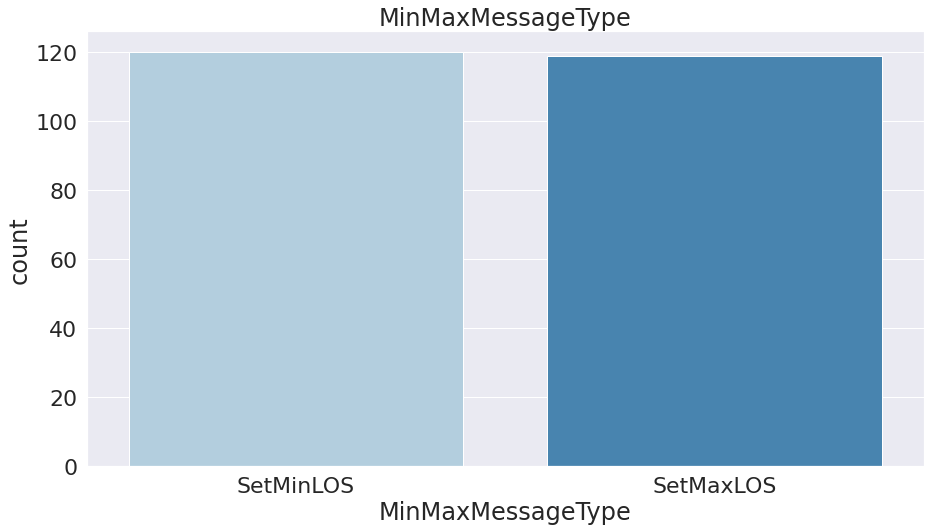

In [79]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 2)
sns.countplot(x = HotelBookingRuleNotifRQ.MinMaxMessageType, data = HotelBookingRuleNotifRQ, palette = 'Blues')
plt.title('MinMaxMessageType')
plt.show()

#### Checking null values for hotelCode

In [166]:
HotelBookingRuleNotifRQ.Time.isna().sum()

0

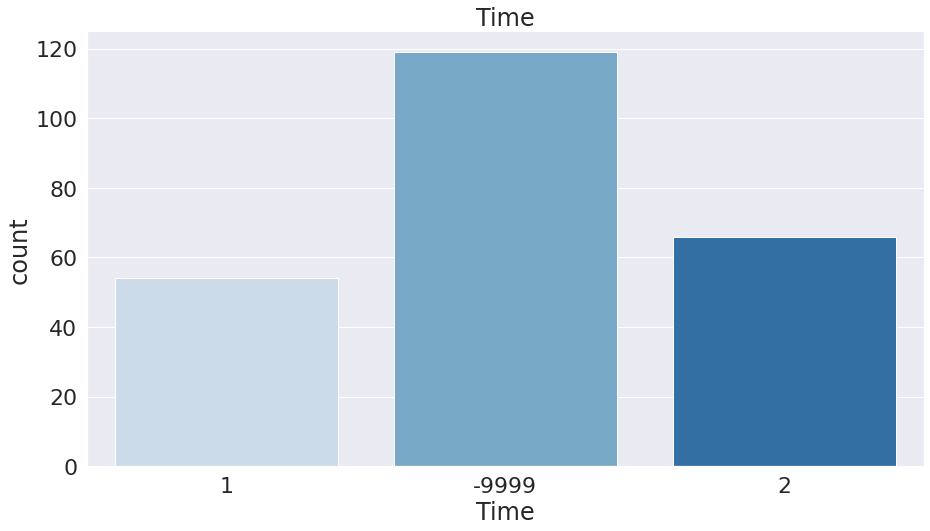

In [80]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 2)
sns.countplot(x = HotelBookingRuleNotifRQ.Time, data = HotelBookingRuleNotifRQ, palette = 'Blues')
plt.title('Time')
plt.show()

#### Checking null values for hotelCode

In [81]:
HotelBookingRuleNotifRQ.Start.isna().sum()

0

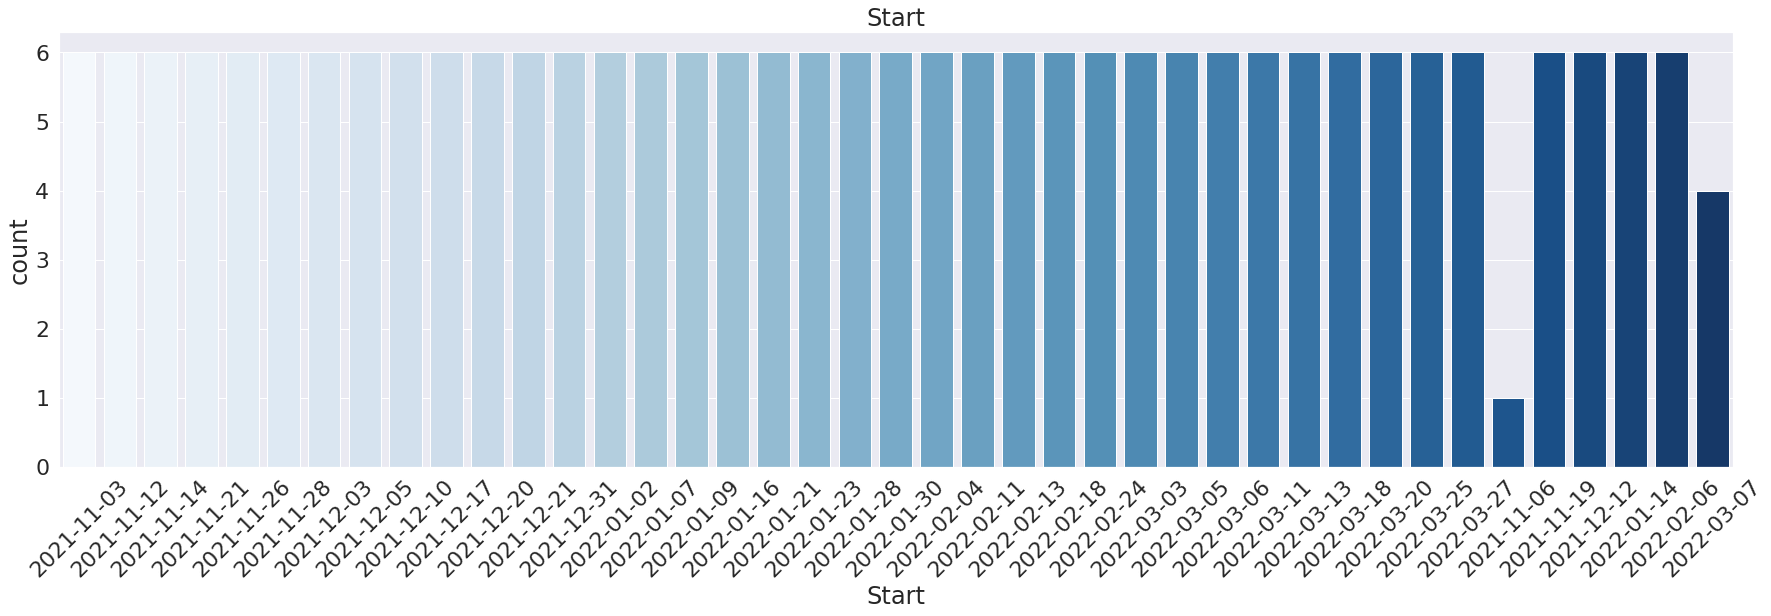

In [89]:
plt.figure(figsize=(30,8))
sns.set(font_scale = 2)
sns.countplot(x = HotelBookingRuleNotifRQ.Start, data = HotelBookingRuleNotifRQ, palette = 'Blues')
plt.xticks(rotation=45)
plt.title('Start')
plt.show()

#### Checking null values for hotelCode

In [90]:
HotelBookingRuleNotifRQ.End.isna().sum()

0

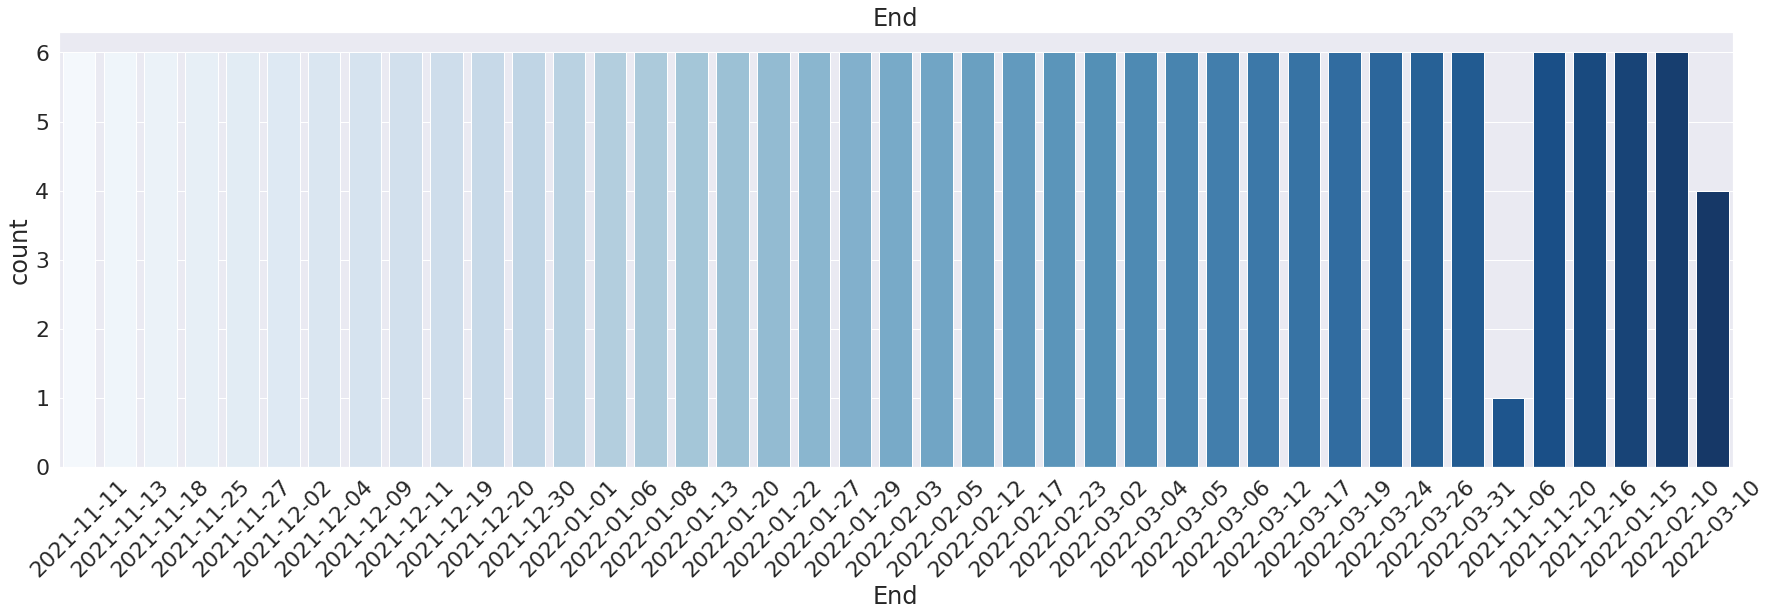

In [92]:
plt.figure(figsize=(30,8))
sns.set(font_scale = 2)
sns.countplot(x = HotelBookingRuleNotifRQ.End, data = HotelBookingRuleNotifRQ, palette = 'Blues')
plt.xticks(rotation=45)
plt.title('End')
plt.show()

In [93]:
HotelBookingRuleNotifRQ["timeDiff"] = [x.days for x in HotelBookingRuleNotifRQ["timeDiff"]]

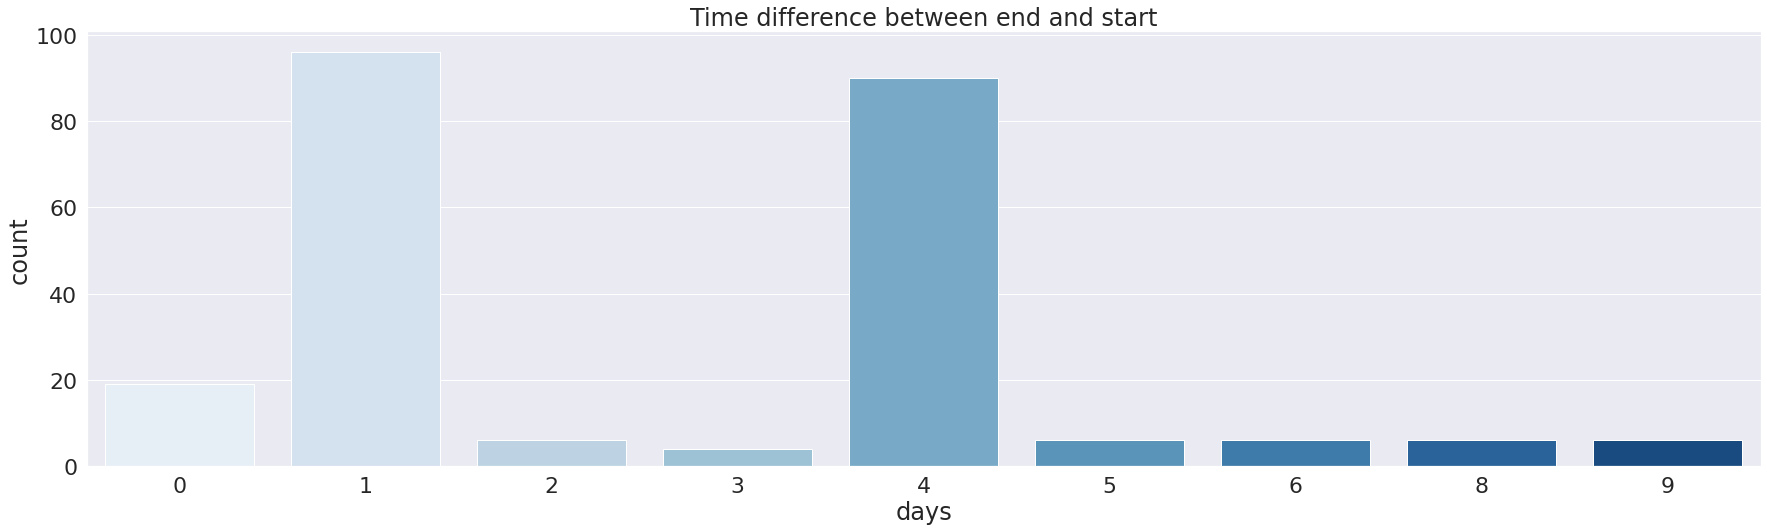

In [100]:
plt.figure(figsize=(30,8))
sns.set(font_scale = 2)
sns.countplot(x = HotelBookingRuleNotifRQ.timeDiff, data = HotelBookingRuleNotifRQ, palette = 'Blues')
plt.title('Time difference between end and start')
plt.xlabel("days")
plt.show()